### Linear Regression
[Linear Regression](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/): Assumes linear relationship between features (independant variable) and the target value (fare amount), to find the best linear equasion / line, that best minimizes the differences netweem predicted and actual values and described how the input vairables influence the target variables.

---
### Ridge Regression
[Ridge Regression](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/): Regulization techniuque adding penalty term (L2 penalty) to linear regression model to shrink coefficient values. The L2 penalty (adds sum of summed coeicieet values multiplied by a turning parameter (lambda)), it discoureges lerge coefficient values, pushing them towards zero. Shrinking the less important features impact so they affect model less.

$$\text{Ridge Cost Function} = Loss + \lambda \cdot \sum||w||^2$$

$$\text{Loss = Sum of squared residuals}$$
$$\lambda = \text{penalty for errors}$$
$$\text{w = slope of curve or line}$$

$$\text{Lower result = Better}$$

Ex: if two dots are ON a line then Loss = 0

---
### Lasso Regression
[Lasso Regression](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/): Also known as Least Attribute Shrinkage and Selection Operator, it's a regularisaion method that also includes penalty but sets some coefficients to 0, essentially selecting which elements matter. It uses L1 penalty (sum of absolute values of the coefficients multiplied by lambda)

$$\text{Lasso Cost Function} = Loss + \lambda \cdot \sum||w||^2$$

---

Higher $\lambda \text{ = stronger effect}$

##### For Lasso and Ridge they are very similar to linear regression however you can tune it to get best lambda value for them using validation set (then score it on the test set) (alpha=lambda)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the Boston Housing dataset
iris = load_iris()
X, y = iris.data, iris.target

In [2]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
# Example lambdas to try
lambdas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [4]:
# Ridge Regression
lambda_ridge = None
best_score_ridge = -np.inf

for lambda_ in lambdas:
    # Train Ridge regression
    ridge = Ridge(alpha=lambda_)
    ridge.fit(X_train, y_train)
    
    # Evaluate on validation set
    val_score = ridge.score(X_val, y_val)
    print(val_score)
    
    # Check if this lambda gives better validation score
    if val_score > best_score_ridge:
        best_score_ridge = val_score
        best_lambda_ridge = lambda_


print(f"Best lambda for Ridge: {best_lambda_ridge} with score: {best_score_ridge}")

0.9572459967255911
0.9572346723174584
0.9571196304784988
0.9559385694795646
0.9484051211275705
0.8949566155829399
Best lambda for Ridge: 0.001 with score: 0.9572459967255911


In [5]:
# Train final Ridge model with best lambda on combined training + validation set
final_ridge = Ridge(alpha=best_lambda_ridge)

#you dont need to combine them again but since we wont be testing on validation test we can add it to our train
final_ridge.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Evaluate on test set
test_score_ridge = final_ridge.score(X_test, y_test)
print(f"Ridge Regression Test Score: {test_score_ridge}")

Ridge Regression Test Score: 0.9179595023251104


-----------
Easier:

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
hyperParameters = {'alpha':[1e-15,1e-10,1e-5,1e-3,1e-2,1,5,10,20,30,50,100]}
ridgeRegressor = GridSearchCV(Ridge(), hyperParameters, scoring=['neg_mean_squared_error', 'r2', 'neg_root_mean_squared_error'], refit='neg_root_mean_squared_error', cv=5)
#its neg as sklearn interprets higher values as better performance, which is the opposite of convention
#cv = cross validation
#refit using your most imporatant scoring value

ridgeRegressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 50, 100]},
             refit='neg_root_mean_squared_error',
             scoring=['neg_mean_squared_error', 'r2',
                      'neg_root_mean_squared_error'])

retrieve specific scores using `cv_results_['mean_test(score_type)']`

In [8]:
ridgeRegressor.cv_results_['mean_test_r2']

array([0.32256072, 0.32256072, 0.32256071, 0.32255951, 0.3225485 ,
       0.32083571, 0.31274371, 0.3046659 , 0.29291302, 0.28373766,
       0.26758969, 0.22639666])

In [9]:
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 1e-15}
Best score for cost function:  -0.24436283021265548


---

In [10]:
# Lasso Regression
best_lambda_lasso = None
best_score_lasso = -np.inf

for lambda_ in lambdas:
    # Train Lasso regression
    lasso = Lasso(alpha=lambda_)
    lasso.fit(X_train, y_train)
    
    # Evaluate on validation set
    val_score = lasso.score(X_val, y_val)
    
    # Check if this lambda gives better validation score
    if val_score > best_score_lasso:
        best_score_lasso = val_score
        best_lambda_lasso = lambda_

print(f"Best lambda for Lasso: {best_lambda_lasso}")

# Train final Lasso model with best lambda on combined training + validation set
final_lasso = Lasso(alpha=best_lambda_lasso)
final_lasso.fit(np.concatenate([X_train, X_val]), np.concatenate([y_train, y_val]))

# Evaluate on test set
test_score_lasso = final_lasso.score(X_test, y_test)
print(f"Lasso Regression Test Score: {test_score_lasso}")

Best lambda for Lasso: 0.001
Lasso Regression Test Score: 0.9178552141365568


---

### Lambda in Regularized Linear Regression

In the context of regularized linear regression, such as Ridge and Lasso regression, the lambda ($\lambda$) value refers to the regularization parameter. This parameter controls the penalty applied to the coefficients of the model to prevent overfitting.

#### Ridge Regression

In Ridge regression, the objective function to minimize is:

$ \text{Loss}_{\text{ridge}} (L_1) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $

- $ (y_i - \hat{y}_i)^2 $ is the squared error between the predicted and actual values.
- $ \lambda $ (lambda) is the regularization parameter.
- $ \sum_{j=1}^{p} \beta_j^2 $ is the sum of squared coefficients (penalty term).

The lambda value controls the relative importance of the penalty term compared to the squared error term. A higher lambda means stronger regularization, leading to smaller coefficients (shrinking effect) and potentially better generalization to unseen data by reducing overfitting.

#### Lasso Regression

In Lasso regression, the objective function is slightly different:

$ \text{Loss}_{\text{lasso}} (L_1) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $

- $ |\beta_j| $ is the absolute value of the coefficients (L1 norm).
- $ \lambda $ (lambda) is again the regularization parameter.

Lasso regression tends to produce sparse models by setting some coefficients exactly to zero, effectively performing feature selection. The lambda value here also controls the strength of regularization.

### Key Points

- **Lambda Controls Regularization**: In both Ridge and Lasso regression, lambda determines how much to penalize the complexity of the model (large coefficients).
- **Choosing Lambda**: Selecting an appropriate lambda is crucial for balancing bias and variance in the model. Too low a lambda might lead to overfitting, while too high might lead to underfitting.
- **Effect on Coefficients**: Higher lambda values result in smaller coefficients, influencing the model's flexibility and generalization ability.

In practice, the lambda value is chosen through techniques such as cross-validation on a validation set, where different lambda values are tried, and the one that yields the best performance on the validation set is selected for the final model.


---

## Regularization

Used to calibrate linear regression models, to minimize adjusted loss function to **prevent overfitting or underfitting**

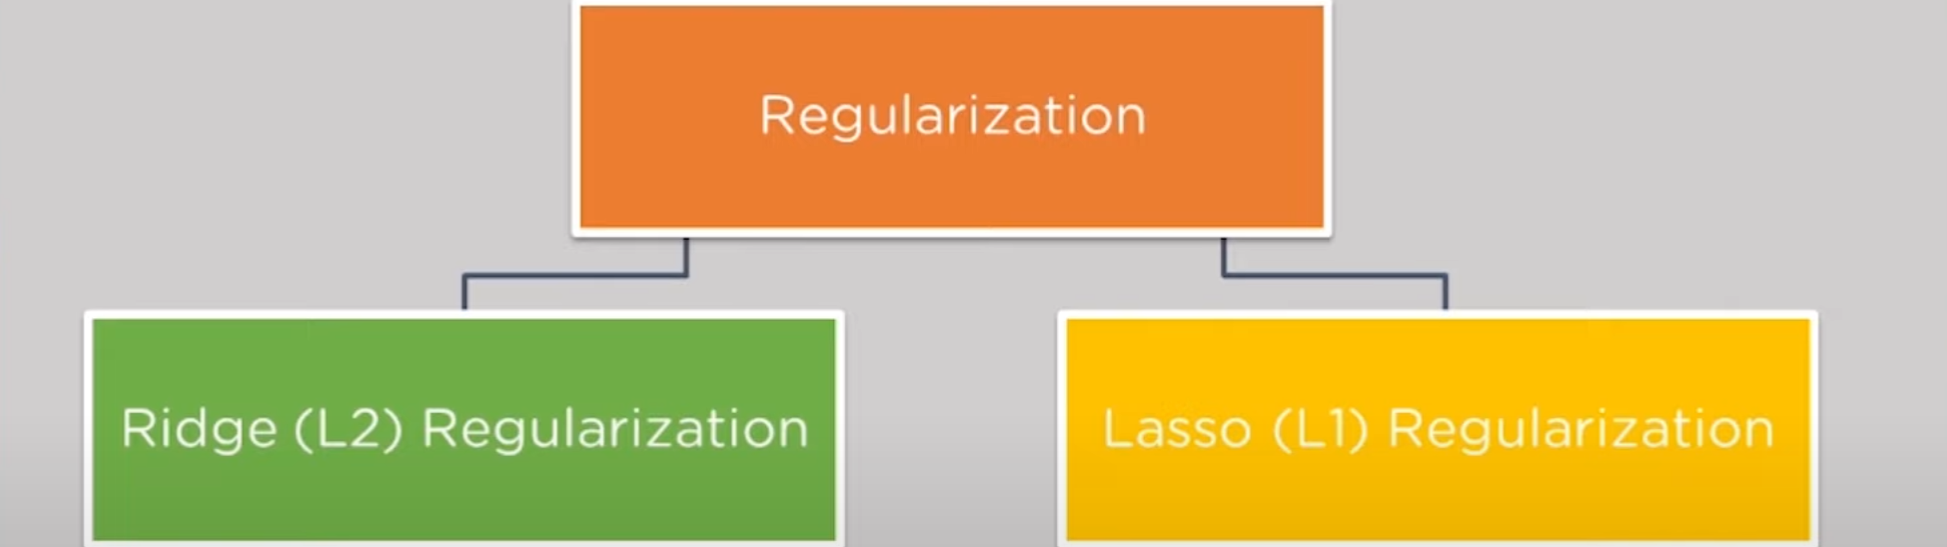

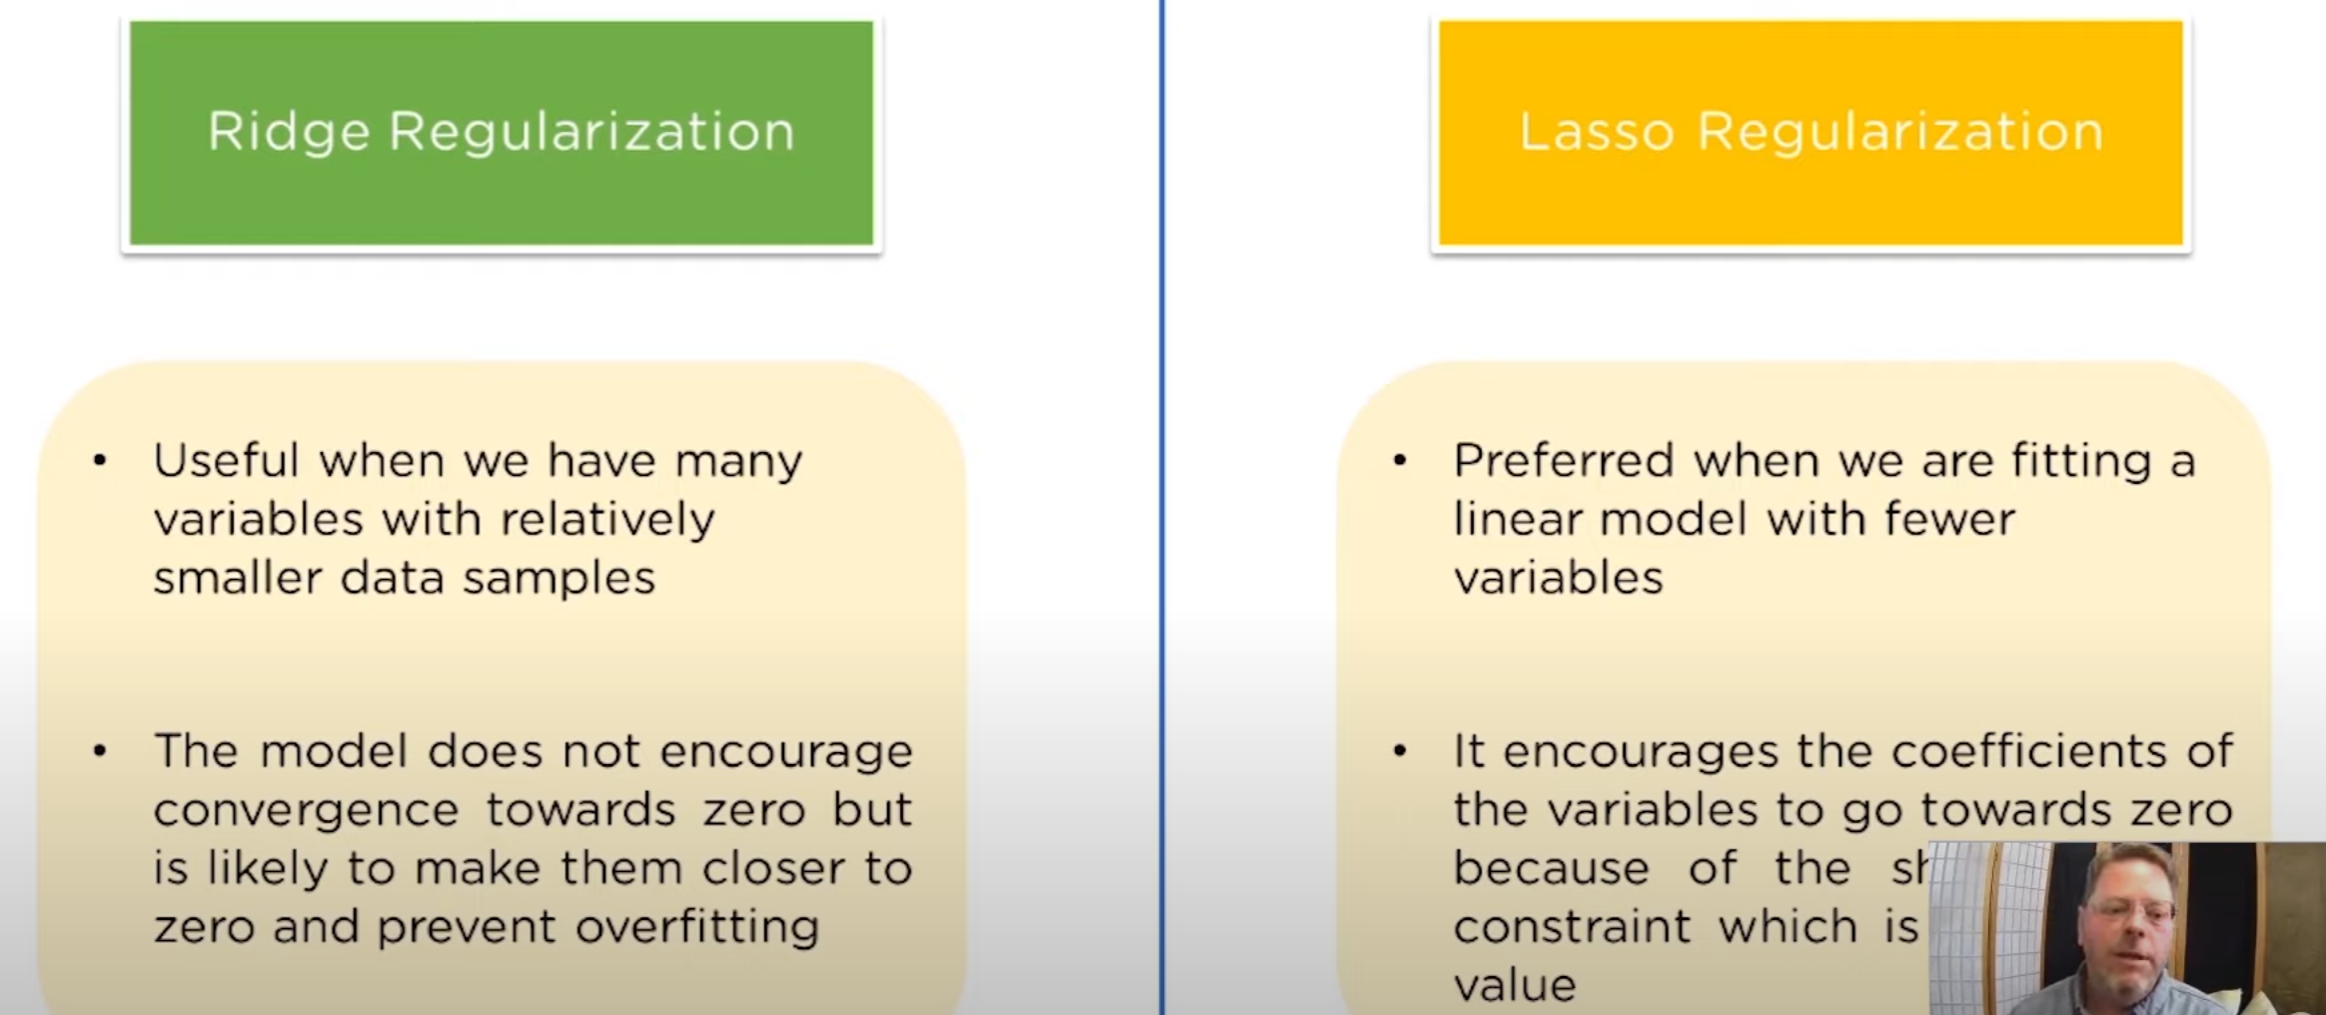